In [1]:
import pandas as pd
import re
import numpy as np

In [2]:
df = pd.read_csv('labelin_sentiment_bbm.csv', encoding = 'utf-8')
df.head()

,Datetime,Tweet Id,Username,Text,remove_user,normalisasi,case_folding,tokenisasi,stopword_removal,stemming,scores,compound,sentimen
0,2022-09-04 23:59:50+00:00,1.570000e+23,AdeSidharta3,b'@TeddGus ya .. dengan semakin banyak yang me...,b' ya .. dengan semakin banyak yang memiliki k...,dengan semakin banyak yang memiliki kendaraan...,dengan semakin banyak yang memiliki kendaraan...,"['dengan', 'semakin', 'banyak', 'yang', 'memil...","['memiliki', 'kendaraan', 'bermotor', 'merasak...",milik kendara motor rasa dampak naik bbm terny...,"{'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'comp...",0.4939,positif
1,2022-09-04 23:59:36+00:00,1.570000e+23,BachtiarKakang,b'Ditopang indikator ekonomi kenaikan harga BB...,b'Ditopang indikator ekonomi kenaikan harga BB...,Ditopang indikator ekonomi kenaikan harga BBM...,ditopang indikator ekonomi kenaikan harga bbm...,"['ditopang', 'indikator', 'ekonomi', 'kenaikan...","['ditopang', 'indikator', 'ekonomi', 'kenaikan...",topang indikator ekonomi naik harga bbm nilai ...,"{'neg': 0.0, 'neu': 0.642, 'pos': 0.358, 'comp...",0.8625,positif
2,2022-09-04 23:59:33+00:00,1.570000e+23,AlbertSolo2,b'Sejumlah Perusahaan Otobus (PO) terpantau mu...,b'Sejumlah Perusahaan Otobus (PO) terpantau mu...,Sejumlah Perusahaan Otobus terpantau mulai me...,sejumlah perusahaan otobus terpantau mulai me...,"['sejumlah', 'perusahaan', 'otobus', 'terpanta...","['perusahaan', 'otobus', 'terpantau', 'mengere...",usaha otobus pantau kerek harga jual tiket imb...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
3,2022-09-04 23:59:26+00:00,1.570000e+23,radaraktual,"b'Dampak Kenaikan Harga BBM, Sandiaga Uno Ungk...","b'Dampak Kenaikan Harga BBM, Sandiaga Uno Ungk...",Dampak Kenaikan Harga BBM Sandiaga Uno Ungkap...,dampak kenaikan harga bbm sandiaga uno ungkap...,"['dampak', 'kenaikan', 'harga', 'bbm', 'sandia...","['dampak', 'kenaikan', 'harga', 'bbm', 'sandia...",dampak naik harga bbm sandiaga uno tarif jasa ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
4,2022-09-04 23:58:56+00:00,1.570000e+23,polresjembrana,b'Kunjungi SPBU Pekutatan Pasca Kenaikan Harga...,b'Kunjungi SPBU Pekutatan Pasca Kenaikan Harga...,Kunjungi SPBU Pekutatan Pasca Kenaikan Harga ...,kunjungi spbu pekutatan pasca kenaikan harga ...,"['kunjungi', 'spbu', 'pekutatan', 'pasca', 'ke...","['kunjungi', 'spbu', 'pekutatan', 'pasca', 'ke...",kunjung spbu kutat pasca naik harga bbm polsek...,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",0.5106,positif


In [3]:
#konversi sentiment ke polaritas
def convert(polarity):
    if polarity == 'positif':
        return 1
    elif polarity == 'neutral':
        return 0
    else:
        return -1
    
df['polarity'] = df['sentimen'].apply(convert)
df.head()

,Datetime,Tweet Id,Username,Text,remove_user,normalisasi,case_folding,tokenisasi,stopword_removal,stemming,scores,compound,sentimen,polarity
0,2022-09-04 23:59:50+00:00,1.570000e+23,AdeSidharta3,b'@TeddGus ya .. dengan semakin banyak yang me...,b' ya .. dengan semakin banyak yang memiliki k...,dengan semakin banyak yang memiliki kendaraan...,dengan semakin banyak yang memiliki kendaraan...,"['dengan', 'semakin', 'banyak', 'yang', 'memil...","['memiliki', 'kendaraan', 'bermotor', 'merasak...",milik kendara motor rasa dampak naik bbm terny...,"{'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'comp...",0.4939,positif,1
1,2022-09-04 23:59:36+00:00,1.570000e+23,BachtiarKakang,b'Ditopang indikator ekonomi kenaikan harga BB...,b'Ditopang indikator ekonomi kenaikan harga BB...,Ditopang indikator ekonomi kenaikan harga BBM...,ditopang indikator ekonomi kenaikan harga bbm...,"['ditopang', 'indikator', 'ekonomi', 'kenaikan...","['ditopang', 'indikator', 'ekonomi', 'kenaikan...",topang indikator ekonomi naik harga bbm nilai ...,"{'neg': 0.0, 'neu': 0.642, 'pos': 0.358, 'comp...",0.8625,positif,1
2,2022-09-04 23:59:33+00:00,1.570000e+23,AlbertSolo2,b'Sejumlah Perusahaan Otobus (PO) terpantau mu...,b'Sejumlah Perusahaan Otobus (PO) terpantau mu...,Sejumlah Perusahaan Otobus terpantau mulai me...,sejumlah perusahaan otobus terpantau mulai me...,"['sejumlah', 'perusahaan', 'otobus', 'terpanta...","['perusahaan', 'otobus', 'terpantau', 'mengere...",usaha otobus pantau kerek harga jual tiket imb...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,0
3,2022-09-04 23:59:26+00:00,1.570000e+23,radaraktual,"b'Dampak Kenaikan Harga BBM, Sandiaga Uno Ungk...","b'Dampak Kenaikan Harga BBM, Sandiaga Uno Ungk...",Dampak Kenaikan Harga BBM Sandiaga Uno Ungkap...,dampak kenaikan harga bbm sandiaga uno ungkap...,"['dampak', 'kenaikan', 'harga', 'bbm', 'sandia...","['dampak', 'kenaikan', 'harga', 'bbm', 'sandia...",dampak naik harga bbm sandiaga uno tarif jasa ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,0
4,2022-09-04 23:58:56+00:00,1.570000e+23,polresjembrana,b'Kunjungi SPBU Pekutatan Pasca Kenaikan Harga...,b'Kunjungi SPBU Pekutatan Pasca Kenaikan Harga...,Kunjungi SPBU Pekutatan Pasca Kenaikan Harga ...,kunjungi spbu pekutatan pasca kenaikan harga ...,"['kunjungi', 'spbu', 'pekutatan', 'pasca', 'ke...","['kunjungi', 'spbu', 'pekutatan', 'pasca', 'ke...",kunjung spbu kutat pasca naik harga bbm polsek...,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",0.5106,positif,1


In [4]:
#melihat banyak sentimen
df['sentimen'].value_counts()

positif    2006
negatif    1394
neutral    1021
Name: sentimen, dtype: int64

In [5]:
X = df['stemming']
y = df['polarity']

In [6]:
#BOW

from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer()
print(df['stemming'].shape)
X = bow_transformer.fit_transform(df['stemming'].apply(lambda x: np.str_(x)))

print(X.toarray())
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)

(4421,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Shape of Sparse Matrix:  (4421, 9077)
Amount of Non-Zero occurrences:  51514


In [7]:
#spliting data (membagi data menjadi data test dan data train)
#DATA Train Test 20%:80% dari 885 Data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=885)
# print(X_test)

In [8]:
#Klasifikasi Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

nb = MultinomialNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          -1       0.46      0.38      0.42       286
           0       0.31      0.16      0.21       187
           1       0.52      0.69      0.59       412

    accuracy                           0.48       885
   macro avg       0.43      0.41      0.41       885
weighted avg       0.45      0.48      0.45       885



In [9]:
#nilai akurasi dengan naive bayes
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.47796610169491527


In [10]:
#banyak nilai testing
np.shape(X_test)

(885, 9077)

In [11]:
#banyak nilai training
np.shape(X_train)

(3536, 9077)

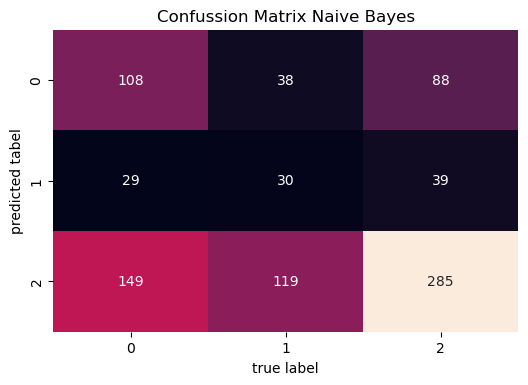

In [12]:
#CONFUSION MATRIX
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(dpi=100)
mat = confusion_matrix(y_test, preds)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.title('Confussion Matrix Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted tabel')
plt.show()